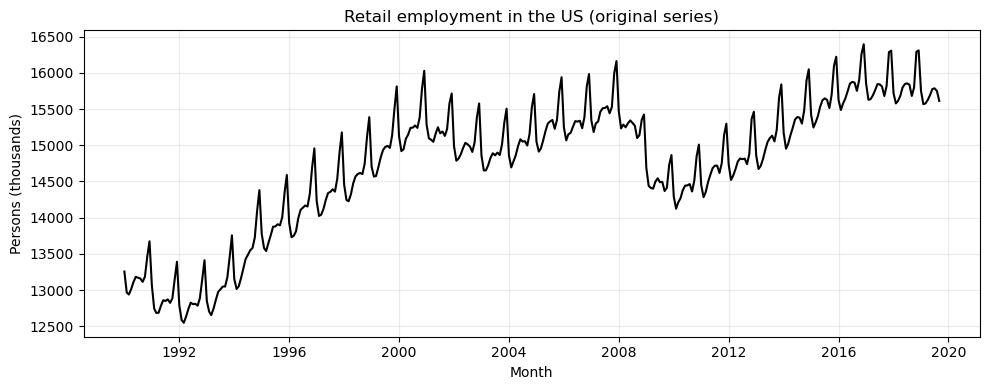

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# -----------------------------
# 0) Carga de datos
# -----------------------------
df = pd.read_csv("us_employment.csv", parse_dates=['ds'])
# Nos quedamos con el sector "Retail Trade" y desde 1990
retail = (
    df.loc[df["unique_id"] == "Retail Trade", ["ds", "y"]]
      .sort_values("ds")
      .query('ds >= "1990-01-01"')
      .reset_index(drop=True)
)

y = retail["y"]
ds = retail["ds"]

# -----------------------------
# 1) Figura 3.3 – Serie original
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(ds, y, color="black", linewidth=1.5)
plt.title("Retail employment in the US (original series)")
plt.xlabel("Month")
plt.ylabel("Persons (thousands)")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


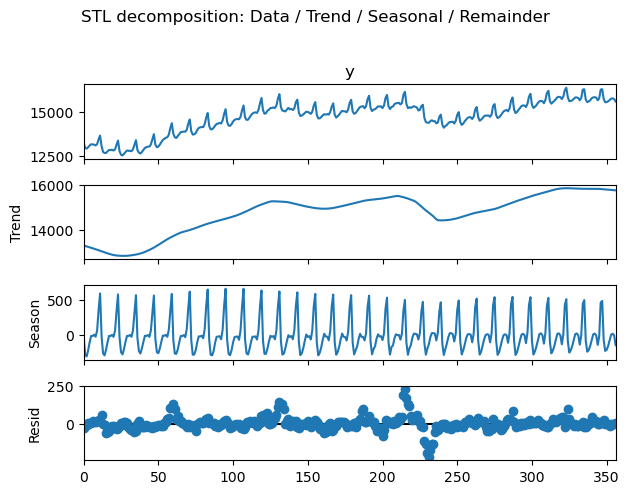

In [9]:
# -----------------------------
# 2) Figura 3.5 – Descomposición STL
# -----------------------------
# period=12 por ser datos mensuales con patrón anual
stl = STL(y, period=12, robust=True)
res = stl.fit()

# Opción simple: el propio helper de statsmodels
fig = res.plot()
fig.suptitle("STL decomposition: Data / Trend / Seasonal / Remainder", y=1.02)
plt.tight_layout()
plt.show()


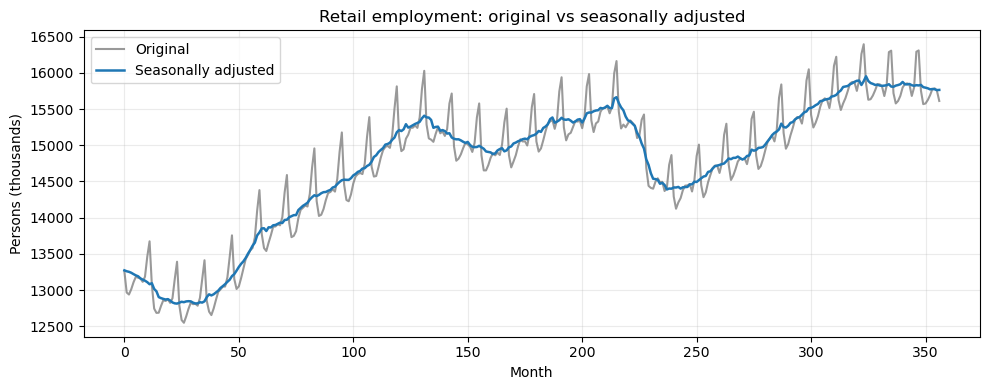

In [10]:
# -----------------------------
# 3) Figura 3.6 – Original vs Desestacionalizada
# -----------------------------
# Convertimos componentes a Series con el MISMO índice de fechas
seasonal = pd.Series(res.seasonal, index=y.index, name='Seasonal')
trend = pd.Series(res.trend, index=y.index, name='Trend')
remainder = pd.Series(res.resid, index=y.index, name='Remainder')

# Serie desestacionalizada (aditiva)
y_sa = (y - seasonal).rename('Seasonally adjusted (additive)')

# Por si hubiera algún NaN residual, los quitamos de forma conjunta para graficar
plot_df = pd.concat([y.rename('Original'), y_sa], axis=1).dropna()

plt.figure(figsize=(10, 4))
plt.plot(plot_df.index, plot_df['Original'], label='Original', color='gray', alpha=0.8)
plt.plot(plot_df.index, plot_df['Seasonally adjusted (additive)'],
         label='Seasonally adjusted', linewidth=1.8)
plt.title('Retail employment: original vs seasonally adjusted')
plt.xlabel('Month'); plt.ylabel('Persons (thousands)')
plt.legend(); plt.grid(True, alpha=0.25)
plt.tight_layout(); plt.show()